# Q1: Setup & Exploration

**Phase 1-2:** Project Setup, Data Exploration  
**Points: 6 points**

**Focus:** Load data, perform initial inspection, identify data quality issues.

**Lecture Reference:** Lecture 11, Notebook 1 ([`11/demo/01_setup_exploration_cleaning.ipynb`](https://github.com/christopherseaman/datasci_217/blob/main/11/demo/01_setup_exploration_cleaning.ipynb)), Phases 1-2. Also see Lecture 04 (pandas I/O) and Lecture 07 (visualization).

---

## Setup

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import os

# Create output directory
os.makedirs('output', exist_ok=True)

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [46]:

# Load the data
df = pd.read_csv('data/beach_sensors.csv')

#output file 1 
with open('output/q1_data_info.txt', 'w') as f:
    f.write(f'Data Shape:\n{df.shape}\n')
    f.write ("==============================\n")
    f.write(f'Column Names:\n{df.columns}\n')
    f.write ("==============================\n")
    f.write(f'Data Types:\n{df.dtypes}\n')
    f.write ("==============================\n")
    f.write(f'Data Starts from:{df['Measurement Timestamp'].min()}\nData Ends on:{df['Measurement Timestamp'].max()} \n')
    f.write ("==============================\n")
    f.write(f'Missing Values Per Column:\n {df.isnull().sum()}\n')


In [48]:
#output file 2

summarydf = df.describe()
summarydf = summarydf.T
summarydf['missing_count'] = df.select_dtypes(include=['number']).isnull().sum()
summarydf = summarydf.drop(['count','25%','75%','50%'], axis=1)
summarydf.index.name = 'column_name'
summarydf.to_csv('output/q1_exploration.csv')
summarydf

,mean,std,min,max,missing_count
column_name,,,,,
Air Temperature,12.618013,10.439214,-29.78,37.60,75
Wet Bulb Temperature,10.270200,9.406844,-28.90,28.40,75981
Humidity,68.023011,15.632283,0.00,100.00,0
Rain Intensity,0.158882,1.793771,0.00,183.60,75981
Interval Rain,0.142319,1.096736,-0.90,63.42,0
Total Rain,141.460993,190.437350,0.00,1056.10,75981
Precipitation Type,4.269477,15.593242,0.00,70.00,75981
Wind Direction,140.797572,122.018278,0.00,359.00,0
Wind Speed,2.918625,5.340993,0.00,999.90,0


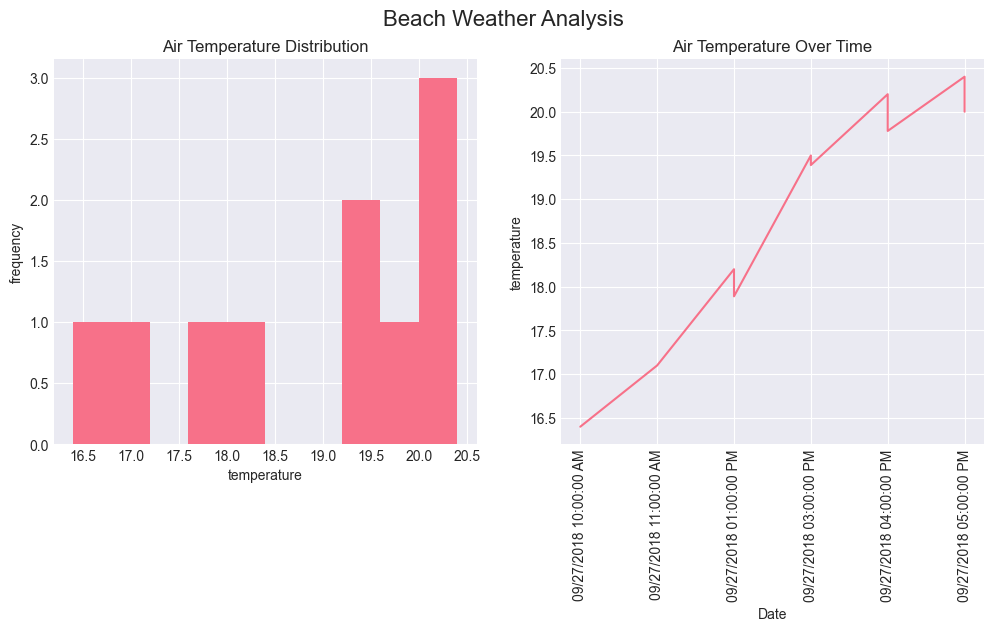

In [65]:
# output 3
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].hist(df['Air Temperature'].head(10))
axes[1].plot(df['Measurement Timestamp'].head(10),df['Air Temperature'].head(10))
axes[0].set_title('Air Temperature Distribution')
axes[1].set_title('Air Temperature Over Time')
axes[1].tick_params(axis='x', rotation=90)
axes[0].set_xlabel('temperature')
axes[0].set_ylabel('frequency')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('temperature')
fig.suptitle('Beach Weather Analysis', fontsize=16)

fig.savefig('output/q1_visualizations.png', dpi=300)

plt.show()

---

## Objective

Load the Chicago Beach Weather Sensors dataset, perform initial inspection, and identify data quality issues.

**Note:** The datetime column in this dataset is named `Measurement Timestamp`.

**Time Series Note:** Unlike the lecture's NYC Taxi data (event-based), this dataset is **time-series data** with continuous sensor readings. The data is already indexed by time, so you'll work with datetime-indexed dataframes throughout. See **Lecture 09** for time series operations. For time series visualizations, you may want to use pandas `resample()` to aggregate data (e.g., daily averages) for clearer visualization of long-term trends.

---

## Required Artifacts

You must create exactly these 3 files in the `output/` directory:

### 1. `output/q1_data_info.txt`
**Format:** Plain text file
**Content:** Dataset information including:
- Dataset shape (rows × columns)
- Column names (one per line or comma-separated)
- Data types for each column
- Date range (start date and end date) - **REQUIRED if temporal data**
- Missing value counts for each column (column name: count)

**Example format:**
```
Dataset Shape: 50000 rows × 10 columns

Column Names:
- Measurement Timestamp
- Beach
- Water Temperature
- Air Temperature
...

Data Types:
- Measurement Timestamp: datetime64[ns]
- Beach: object
- Water Temperature: float64
...

Date Range:
Start: 2022-01-01 00:00:00
End: 2027-09-15 07:00:00

Missing Values:
- Water Temperature: 2500 (5.0%)
- Air Temperature: 1500 (3.0%)
...
```

### 2. `output/q1_exploration.csv`
**Format:** CSV file
**Required Columns (exact names):** `column_name`, `mean`, `std`, `min`, `max`, `missing_count`
**Content:** One row per numeric column in the dataset
- `column_name`: Name of the numeric column
- `mean`: Mean value (float)
- `std`: Standard deviation (float)
- `min`: Minimum value (float)
- `max`: Maximum value (float)
- `missing_count`: Number of missing values (integer)

**Example:**
```csv
column_name,mean,std,min,max,missing_count
Water Temperature,15.23,5.12,0.5,28.7,2500
Air Temperature,18.45,8.23,-5.2,35.8,1500
Wind Speed,6.78,4.56,0.1,25.3,0
```

### 3. `output/q1_visualizations.png`
**Format:** PNG image file
**Content:** At least 2 plots in a single figure (use subplots)
**Required plots:**
1. **Distribution plot:** Histogram or density plot of at least one numeric variable
2. **Time series plot:** Line plot showing a numeric variable over time (if temporal data)

**Requirements:**
- Clear axis labels (xlabel, ylabel)
- Title for each subplot
- Overall figure title (optional but recommended)
- Legend if multiple series shown
- Saved as PNG with sufficient resolution (dpi=150 or higher)

---

## Requirements Checklist

- [ ] Data loaded successfully from `data/beach_sensors.csv`
- [ ] Initial inspection completed (shape, info, head, describe)
- [ ] Missing values identified and counted
- [ ] Basic visualizations created (at least 2 plots: distribution + time series)
- [ ] All 3 required artifacts saved with exact filenames

---

## Your Approach

1. **Load and inspect the dataset** - Use standard pandas I/O and inspection methods
2. **Parse datetime** - Identify and convert datetime column(s)
3. **Identify missing values** - Count and calculate percentages per column
4. **Create visualizations** - Distribution plot + time series plot (use subplots)
5. **Save artifacts** - Write to the three required output files

---

## Decision Points

- **Visualization choices:** What types of plots best show your data? See Lecture 11 Notebook 1 for examples.
- **Data quality assessment:** What issues do you see? Missing data patterns? Outliers? Inconsistent formats? Document these for Q2.

---

## Checkpoint

After Q1, you should have:
- [ ] Data loaded successfully
- [ ] Basic statistics calculated
- [ ] Initial visualizations created (2+ plots)
- [ ] Data quality issues identified
- [ ] All 3 artifacts saved: `q1_data_info.txt`, `q1_exploration.csv`, `q1_visualizations.png`

---

**Next:** Continue to `q2_data_cleaning.md` for Data Cleaning.
